Finite Volume Method for Solid Mechanics
======
***

In [1]:
import numpy as np

In [2]:
# Define mesh geometry and boundary conditions

Lx = 1 #width of domain
Ly = 1 #height of domain

fac = 1

nx = 4      #number of control volumes in the x-direction
ny = 4    #number of control volumes in the y-direction

## Define required variables

dx = Lx/nx          #length of each control volume in the x-direction
dy = Ly/ny          #length of each control volume in the y-direction
Sfx = dy            #area vector x component (Area of East and West Faces)
Sfy = dx            #area vector y component (Area of North and South Faces)


In [3]:
## Define  position and time vectors

x = np.zeros((1,nx+2))   #position vector defining the center points of the control volumes in the x-direction.
x[0,nx+1] = Lx
x[0,1:nx+1] = np.arange(dx/2,Lx,dx)

y = np.zeros((1,ny+2))   #position vector defining the center points of the control volumes in the y-direction.
y[0,ny+1] = Ly
y[0,1:ny+1] = np.arange(dy/2,Ly,dy)

dispx, dispy = np.meshgrid(x, y)


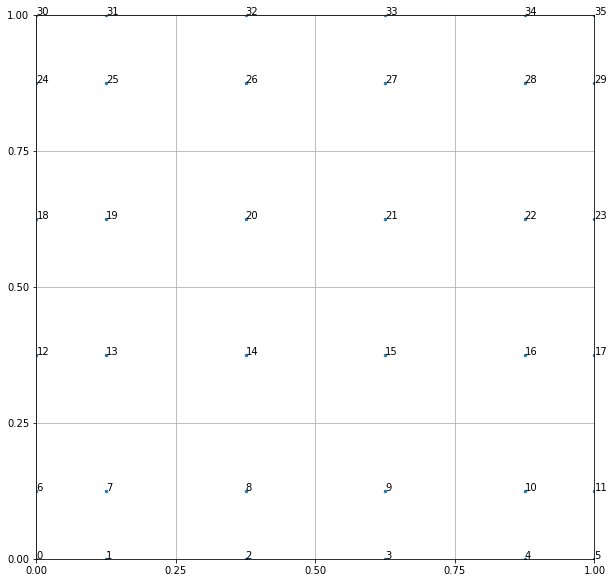

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35])

In [4]:
# Visualise Mesh
import matplotlib.pyplot as plt
import numpy as np

labels = np.arange(0,len(dispx)*len(dispy),1)

plt.figure(figsize=(10, 10*(Lx/Ly)))
plt.xticks(np.arange(0, Lx+1, Lx/nx))
plt.yticks(np.arange(0, Ly+1, Ly/ny))
plt.xlim(0, Lx)
plt.ylim(0, Ly)

plt.rc('grid', linestyle="--", color='black')
# plt.scatter(x, y)
plt.grid(True)
plt.rc('grid', linestyle="--", color='black')
plt.scatter(dispx, dispy, s = 6)

dispx_new = dispx.reshape(len(dispx)*len(dispy), 1)
dispy_new = dispy.reshape(len(dispx)*len(dispy), 1)

for i in labels:
    plt.annotate(str(i), xy=(dispx_new[i][0],dispy_new[i][0]))

# plt.annotate(str(0), xy=(dispx_new[0][0],dispy_new[0][0]))

plt.show()

labels

Navier-Stokes Equation
======
***


Navier-Stokes equation: 
$$\frac{\partial^2 (\rho u)}{\partial t^2} - \nabla  \cdot \sigma = \rho f$$

where $\rho$ is the density, $u$ is the displacement vector, $\sigma$ is the stress tensor and $f$ is the body forces.

Assuming no body forces, $ f = 0$:

$$\frac{\partial^2 (\rho u)}{\partial t^2} - \nabla \cdot \sigma = 0$$

Assuming density is constant thoughout the domain and integrating over a Control Volume (CV):

$$ \rho \int_V \frac{\partial^2 (u)}{\partial t^2} \, dV - \int_V \nabla \cdot \sigma \, dV = 0$$ 

Gauss' Divergence Theorem states: 

$$\int_V \nabla \cdot F \, dV= \oint_S F \cdot n \, dS$$

where $F$ is any vector field, and $n$ is the outward pointing unit vector on the CV surface.

Applying this to above: 

$$ \underbrace{  \rho \int_V \frac{\partial^2 (u)}{\partial t^2} \, dV }_{Temporal\space term} -\underbrace{ \oint_S \sigma \cdot n \, dS }_{Diffusion\space term} = 0$$


Temporal Term Discretization
======
***

$$ \frac{\partial^2 u}{\partial t^2} = \frac{u^n - 2u^o + u^{oo}}{\Delta t^2} $$

$n$ = new, $o$ = old, $oo$ = old, old

$$  \rho \int_V \frac{\partial^2 u}{\partial t^2} \, dV = \rho \int_V \frac{u^n - 2u^o + u^{oo}}{\Delta t^2} \, dV = \frac{\rho}{\Delta t^2} \left( \int_V u^n \, dV -2\int_V u^o \, dV + \int_V u^{oo} \, dV \right) $$

From Spatial Variation:

$$ \int u(x)\, dV = u_p V $$

$$  \rho \int_V \frac{\partial^2 u}{\partial t^2} \, dV =  \frac{\rho}{\Delta t^2} \left(  u_p^n V^n -2 u_p^o V^o + u_p^{oo} V^{oo} \right) $$


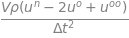

In [5]:
import sympy 
from sympy import *
from sympy import init_printing
from sympy import Function, Symbol
init_printing(use_latex=True)

V = Symbol('V')
u_new = Symbol('u^n')
u_old =  Symbol('u^o')
u_old_old = Symbol('u^oo')
dt = Symbol("\Delta t")
rho = Symbol("rho")

temporal_term = (rho/(dt**2))*(u_new - 2*u_old + u_old_old)*diff(V)

eqn = integrate(temporal_term, V)

# print(eqn)
eqn

Diffusion Term Discretization
======
***

$$\begin{align} \oint_S \sigma \cdot n \, dS & = \sum_{f=1}^{nFaces} \int_{S_f} \sigma_f \cdot n \, dS_f \\ & = \sum_{f=1}^{nFaces} \sigma_f \cdot n |S_f|  \\ 
& =  \sum_{f=1}^{nFaces} \sigma_f \cdot \bold{S_f} \end{align} $$

where $\bold{S_f}$ is the Surface Area vector


Linear Elastic Consitutive Law:

$$ \sigma = 2 \mu \epsilon + \lambda tr(\epsilon)I $$

In [25]:
sigma = Symbol('sigma')
mu = Symbol('mu')
epsilon =  Symbol('epsilon')
Lambda = Symbol('lambda')


$$ \epsilon = \dfrac{1}{2}[\nabla u + (\nabla u)^T] $$

For 2D:

$$ \bold{u} = 
\begin{bmatrix}
u & v
\end{bmatrix}
$$

$$ \nabla = 
\begin{bmatrix}
\dfrac{\delta}{\delta x} \\ \dfrac{\delta}{\delta y}
\end{bmatrix}
$$

$$
\nabla \bold{u} = \begin{bmatrix} \dfrac{\delta}{\delta x} \\ \dfrac{\delta}{\delta y} \end{bmatrix} \begin{bmatrix} u & v \end{bmatrix}
=
\begin{bmatrix}
\dfrac{\delta u}{\delta x} & \dfrac{\delta v}{\delta x} \\ \dfrac{\delta u }{\delta y} & \dfrac{\delta v }{\delta y}
\end{bmatrix}
$$

$$
\epsilon  = \dfrac{1}{2}\left[
\begin{bmatrix}
\dfrac{\delta u}{\delta x} & \dfrac{\delta v}{\delta x} \\ \dfrac{\delta u }{\delta y} & \dfrac{\delta v }{\delta y}
\end{bmatrix}
+ 
\begin{bmatrix}
\dfrac{\delta u}{\delta x} & \dfrac{\delta u }{\delta y} \\ \dfrac{\delta v}{\delta x} & \dfrac{\delta v }{\delta y}
\end{bmatrix}
\right]
$$
$$
\epsilon
=
\begin{bmatrix}
\dfrac{\delta u}{\delta x} & \dfrac{1}{2}\left(\dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y}\right) \\ \dfrac{1}{2}\left(\dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y}\right) & \dfrac{\delta v }{\delta y}
\end{bmatrix}
$$

$$ \sigma = 2 \mu \epsilon + \lambda \left(\dfrac{\delta u}{\delta x} + \dfrac{\delta v}{\delta y} \right)
\begin{bmatrix}
1 & 0 \\ 0 & 1
\end{bmatrix}
$$

$$ 
\sigma = 
\begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
& 
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}
$$


In [26]:
u = Symbol('u')
v = Symbol('v')
x = Symbol('x')
y = Symbol('y')
# v = Function('v')

nabla_u = Matrix([[Derivative(u, x), Derivative(v, x)], [Derivative(u, x), Derivative(v, x) ]])

nabla_u
# disp = Matrix([[u, v]])

# nabla*disp

# Der

⎡d      d    ⎤
⎢──(u)  ──(v)⎥
⎢dx     dx   ⎥
⎢            ⎥
⎢d      d    ⎥
⎢──(u)  ──(v)⎥
⎣dx     dx   ⎦

In [102]:
u = Function('u')
v = Function('v')
x = Symbol('x')
y = Symbol('y')

nabla_disp = Matrix([[ u(x,y).diff(x) , v(x,y).diff(x) ], [ u(x,y).diff(y) , v(x,y).diff(y) ]])

display(nabla_disp)

nabla_disp.T

False

⎡∂            ∂          ⎤
⎢──(u(x, y))  ──(u(x, y))⎥
⎢∂x           ∂y         ⎥
⎢                        ⎥
⎢∂            ∂          ⎥
⎢──(v(x, y))  ──(v(x, y))⎥
⎣∂x           ∂y         ⎦

$$ \epsilon = \dfrac{1}{2}[\nabla u + (\nabla u)^T] $$

In [100]:
from fractions import Fraction

epsilon = Fraction(1,2)*(nabla_disp + nabla_disp.T)
# epsilon = (1/2)*(nabla_disp + nabla_disp.T)

display(epsilon)
# print(epsilon)



⎡                           ∂             ∂          ⎤
⎢                           ──(u(x, y))   ──(v(x, y))⎥
⎢       ∂                   ∂y            ∂x         ⎥
⎢       ──(u(x, y))         ─────────── + ───────────⎥
⎢       ∂x                       2             2     ⎥
⎢                                                    ⎥
⎢∂             ∂                                     ⎥
⎢──(u(x, y))   ──(v(x, y))                           ⎥
⎢∂y            ∂x                  ∂                 ⎥
⎢─────────── + ───────────         ──(v(x, y))       ⎥
⎣     2             2              ∂y                ⎦

Linear Elastic Consitutive Law:

$$ \sigma = 2 \mu \epsilon + \lambda tr(\epsilon)I $$

In [101]:
sigma = 2*mu*epsilon  + Lambda*trace(epsilon)*eye(2)

display(sigma)

⎡                                                             ⎛∂             ∂
⎢                                                             ⎜──(u(x, y))   ─
⎢  ⎛∂             ∂          ⎞       ∂                        ⎜∂y            ∂
⎢λ⋅⎜──(u(x, y)) + ──(v(x, y))⎟ + 2⋅μ⋅──(u(x, y))          2⋅μ⋅⎜─────────── + ─
⎢  ⎝∂x            ∂y         ⎠       ∂x                       ⎝     2         
⎢                                                                             
⎢            ⎛∂             ∂          ⎞                                      
⎢            ⎜──(u(x, y))   ──(v(x, y))⎟                                      
⎢            ⎜∂y            ∂x         ⎟            ⎛∂             ∂          
⎢        2⋅μ⋅⎜─────────── + ───────────⎟          λ⋅⎜──(u(x, y)) + ──(v(x, y))
⎣            ⎝     2             2     ⎠            ⎝∂x            ∂y         

          ⎞        ⎤
─(v(x, y))⎟        ⎥
x         ⎟        ⎥
──────────⎟        ⎥
    2     ⎠        ⎥
                   ⎥
    

$$

\frac{\partial \omega}{\partial \theta} = \left[\begin{matrix}\cos{\left(\phi \right)} \cos{\left(\theta \right)}\\\sin{\left(\phi \right)} \cos{\left(\theta \right)}\\- \sin{\left(\theta \right)}\end{matrix}\right] \ ,\quad\quad\quad \frac{\partial \omega}{\partial \phi} = \left[\begin{matrix}- \sin{\left(\phi \right)} \sin{\left(\theta \right)}\\\sin{\left(\theta \right)} \cos{\left(\phi \right)}\\0\end{matrix}\right] 

$$

Introducing the Stencil
======
***

The Navier-Stokes equation is solved for each CV within our mesh. In order to solve, let's look at what we need so far: 

We've shown that: 

$$ \underbrace{  \rho \int_V \frac{\partial^2 (\bold{u})}{\partial t^2} \, dV }_{Temporal\space term} -\underbrace{ \oint_S \sigma \cdot n \, dS }_{Diffusion\space term} = 0$$

can be written as: 

$$ \underbrace{ \frac{\rho}{\Delta t^2} \left(  \bold{u}_p^n V^n -2 \bold{u}_p^o V^o + \bold{u}_p^{oo} V^{oo} \right)}_{Temporal\space term} 
-
\underbrace{
\sum_{f=1}^{nFaces} \begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
& 
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y}
+ 
\lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}_f \cdot \bold{S_f}
}_{Diffusion\space term}
 = 0 $$


Introduce the stencile idea here so that the reader understands why du/dx are different for the north and south faces, i.e why we need to keep them seperated

$$ 
\begin{align}
 \frac{\rho}{\Delta t^2} \left(   \begin{bmatrix} u \\ v\end{bmatrix}_p^n V^n -2  \begin{bmatrix} u \\ v\end{bmatrix}_p^o V^o + \begin{bmatrix} u \\ v\end{bmatrix}_p^{oo} V^{oo} \right)

& -

\begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
& 
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\ 
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y}
+ 
\lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}_N \cdot \begin{bmatrix} 0 \\ 1 \end{bmatrix}  |S_N|\\

& -

\begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
& 
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y}
+ 
\lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}_S \cdot \begin{bmatrix} 0 \\ -1 \end{bmatrix} |S_S|  \\

& -

 \begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
& 
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y}
+ 
\lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}_E \cdot \begin{bmatrix} 1 \\ 0 \end{bmatrix} |S_E| \\

& -

 \begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
& 
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
&
(2\mu + \lambda)\dfrac{\delta v}{\delta y}
+ 
\lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}_W \cdot \begin{bmatrix} -1 \\ 0 \end{bmatrix} |S_W| = 0 
 
 \end{align}$$

$$

\frac{\rho}{\Delta t^2} \left(   \begin{bmatrix} u \\ v\end{bmatrix}_p^n V^n -2  \begin{bmatrix} u \\ v\end{bmatrix}_p^o V^o + \begin{bmatrix} u \\ v\end{bmatrix}_p^{oo} V^{oo} \right)

-

\begin{bmatrix}
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\end{bmatrix}_N   |S_N|

- 

\begin{bmatrix}
 - \mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\\
 - \left( (2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x} \right)
\end{bmatrix}_S   |S_S|

- 

\begin{bmatrix}
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
\\
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\end{bmatrix}_E   |S_E|

- 

\begin{bmatrix}
- \left((2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y} \right)
\\
- \mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\end{bmatrix}_W   |S_W|

= 0
$$

As this will be a segregated solver, the momentum equation in the x and y direction will be solved seperately:

### x-equation:

$$


\frac{\rho}{\Delta t^2} \left(   u_p^n V^n -2  u_p^o V^o + u_p^{oo} V^{oo} \right)

-

\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _N |S_N|

+

\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _S |S_S|
- 

\left[
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
\right] _E |S_E|

+ 

\left[
(2\mu + \lambda)\dfrac{\delta u}{\delta x} + \lambda\dfrac{\delta v}{\delta y}
\right] _W |S_W|


= 0
$$

### y-equation:

$$

\frac{\rho}{\Delta t^2} \left(   v_p^n V^n -2  v_p^o V^o + v_p^{oo} V^{oo} \right)

-

\left[
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\right] _N |S_N|

+

\left[
(2\mu + \lambda)\dfrac{\delta v}{\delta y} + \lambda\dfrac{\delta u}{\delta x}
\right] _S |S_S|
- 

\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _E |S_E|

+ 

\left[
\mu \left( \dfrac{\delta v}{\delta x} + \dfrac{\delta u}{\delta y} \right)
\right] _W |S_W|

= 0
$$

Solving the x-equation will be used to solve new values of $u$ within the mesh 

Solving the y-equation will be used to solve new values of $v$ within the mesh 

In the 2 above equations thesre are $v$ terms in the x-equation and $u$ terms in y-equation. These values are taken from the iteration previous, i.e, they are known. A segregated solver works by iterating until the difference between the displacement field in the current and previous iteration is very small. 

The terms from previous *timesteps* are also known.

We will now try and group the equations into knowns and unknowns before solving:

x-equation: &emsp;$u$ terms $\rightarrow$ Unknown &emsp;  $v$ terms $\rightarrow$ Known &emsp; $u^o$ & $u^{oo}$ terms $\rightarrow$ Known

y-equation: &emsp;$v$ terms $\rightarrow$ Unknown &emsp;  $u$ terms $\rightarrow$ Known &emsp; $v^o$ & $v^{oo}$ terms $\rightarrow$ Known

Putting the unkown terms on the left hand side and the known terms on the rights hand side we get: 


### x-equation:

$$

\underbrace{

\frac{\rho}{\Delta t^2} \left( u_p^n V^n \right) 

-

\mu \left( \dfrac{\delta u}{\delta y} \right)
_N |S_N|

+

\mu \left( \dfrac{\delta u}{\delta y} \right)
 _S |S_S|
- 

(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x} \right)
 _E |S_E|

+ 

(2\mu + \lambda)
\left(\dfrac{\delta u}{\delta x}\right) 
 _W |S_W|

}_{Unkown}

= 

\underbrace{

\frac{\rho}{\Delta t^2} \left( -2  u_p^o V^o + u_p^{oo} V^{oo} \right)

-


\mu \left( \dfrac{\delta v}{\delta x}  \right)
 _N |S_N|

+

\mu \left( \dfrac{\delta v}{\delta x} \right)
_S |S_S|
- 

\lambda
\left(\dfrac{\delta v}{\delta y}\right)
_E |S_E|

+ 

\lambda
\left(\dfrac{\delta v}{\delta y}\right)
_W |S_W|

}_{Known}

$$

### y-equation:

$$

\underbrace{

\frac{\rho}{\Delta t^2} \left(   v_p^n V^n \right)

-

(2\mu + \lambda)
\left(\dfrac{\delta v}{\delta y}\right) 
 _N |S_N|
 
+

(2\mu + \lambda)
\left(\dfrac{\delta v}{\delta y} \right)
_S |S_S|
- 

\mu
\left( \dfrac{\delta v}{\delta x}\right)
 _E |S_E|

+ 

\mu
\left( \dfrac{\delta v}{\delta x}\right)
 _W |S_W|

}_{Unkown}

= 

\underbrace{

\frac{\rho}{\Delta t^2} \left( -2  v_p^o V^o + v_p^{oo} V^{oo} \right)

-

(2\mu + \lambda) 
\left(\lambda\dfrac{\delta u}{\delta x} \right)
 _N |S_N|

+

(2\mu + \lambda)
\left(\lambda\dfrac{\delta u}{\delta x} \right)
_S |S_S|

- 

\mu
\left( \dfrac{\delta u}{\delta y} \right)
_E |S_E|

+ 

\mu 
\left(  \dfrac{\delta u}{\delta y} \right) 
_W |S_W|

}_{Known}

$$

Notice that the uknown derivative are all in the same direction as the area vectors for each surface, and the known derivatives are perpendicular to the area vectors

Now we want to split (discretisize) the unknown part of the equation into the displacement values within the stencil. 



### x-equation:

$$

\frac{\rho}{\Delta t^2} \left( u_P^n V^n \right) 

-

\mu \left( \dfrac{ u_N - u_P }{dy} \right)
 |S_N|

+

\mu \left( \dfrac{ u_P - u_S }{dy} \right)
  |S_S|
- 

(2\mu + \lambda)
\left(\dfrac{ u_E - u_P}{dx} \right)
  |S_E|

+ 

(2\mu + \lambda)
\left(\dfrac{ u_P - u_W}{dx}\right) 
  |S_W|

= 
RHS

$$

$$

u_P \left[

\frac{\rho}{\Delta t^2} V^n

+ 

\dfrac{\mu |S_N|}{dy} 

+

\dfrac{\mu |S_S|}{dy} 

+

\dfrac{(2\mu + \lambda) |S_E|}{dx}

+

\dfrac{(2\mu + \lambda) |S_W|}{dx}

\right]

-

u_N \dfrac{\mu |S_N|}{dy}

-

u_S \dfrac{\mu |S_S|}{dy}

- 

u_E \dfrac{(2\mu + \lambda) |S_E|}{dx} 

- 

u_W \dfrac{(2\mu + \lambda) |S_W|}{dx} 

= 
RHS

$$

<!-- ### y-equation:

$$


\frac{\rho}{\Delta t^2} \left(   v_p^n V^n \right)

-

(2\mu + \lambda)
\left(\dfrac{\delta v}{dy}\right) 
 _N |S_N|
 
+

(2\mu + \lambda)
\left(\dfrac{\delta v}{dy} \right)
_S |S_S|
- 

\mu
\left( \dfrac{\delta v}{dx}\right)
 _E |S_E|

+ 

\mu
\left( \dfrac{\delta v}{dx}\right)
 _W |S_W|


= 
RHS

$$ -->


### y-equation:

$$


\frac{\rho}{\Delta t^2} \left(   v_p^n V^n \right)

-

(2\mu + \lambda)
\left(\dfrac{v_N - v_P}{dy}\right) 
  |S_N|
 
+

(2\mu + \lambda)
\left(\dfrac{v_P - v_S}{dy} \right)
 |S_S|
- 

\mu
\left( \dfrac{v_E - v_P}{dx}\right)
  |S_E|

+ 

\mu
\left( \dfrac{v_P - v_W}{dx}\right)
  |S_W|

= 
RHS

$$

$$

v_P \left[

\frac{\rho}{\Delta t^2} V^n

+ 

\dfrac{(2\mu + \lambda)  |S_N|}{dy} 

+

\dfrac{(2\mu + \lambda)  |S_S|}{dy} 

+

\dfrac{\mu |S_E|}{dx}

+

\dfrac{\mu |S_W|}{dx}

\right]

-

v_N \dfrac{(2\mu + \lambda) |S_N|}{dy}

-

v_S \dfrac{(2\mu + \lambda) |S_S|}{dy}

- 

v_E \dfrac{\mu |S_E|}{dx} 

- 

v_W \dfrac{\mu |S_W|}{dx} 

= 
RHS

$$

Now we can start discussing how these equations are solved: 

From the above equations, the coefficients of the terms on the right hand side are denoted as $a$ and the full known term on the left hand side is denoted:

### x-equation:

$$
u_P  a_P - u_N a_N - u_S a_S - u_E a_E - u_W a_W
= 
b
$$

### y-equation:

$$
v_P  a_P - v_N a_N - v_S a_S - v_E a_E - v_W a_W
= 
b
$$

 <!-- Explanation one: -->

These equations written in matrix form: 

$$

\begin{bmatrix}
a_P & - a_N & - a_S & -a_E & - a_W
\end{bmatrix}

\begin{bmatrix}
u_P \\ u_N \\ u_S \\ u_E \\ u_W
\end{bmatrix}
= b
$$

This equation must be solved for every CV in the mesh $\rightarrow$ $u_N$ in this equation is $u_P$ i the cell above 

| Syntax      | Description | Test Text     |
| :----:   |    :----:   |          :----: |
|$\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}u_P \\ u_N \\ u_S \\ u_E \\ u_W\end{bmatrix}_{k + 2nx}= b$ |  $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}u_P \\ u_N \\ u_S \\ u_E \\ u_W\end{bmatrix}_{k+ 1 + 2nx}= b$       | $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}u_P \\ u_N \\ u_S \\ u_E \\ u_W\end{bmatrix}_{k+ 2 + 2nx}= b$   |
|$\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}u_P \\ u_N \\ u_S \\ u_E \\ u_W\end{bmatrix}_{k+ nx}= b$ |  $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}u_P \\ u_N \\ u_S \\ u_E \\ u_W\end{bmatrix}_{k+1 + nx}= b$       | $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}u_P \\ u_N \\ u_S \\ u_E \\ u_W\end{bmatrix}_{k+2+ nx}= b$   |
|$\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}{u_P} \\ u_N \\ u_S \\ u_E \\ u_W\end{bmatrix}_k= b$ |  $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}u_P \\ u_N \\ u_S \\ u_E \\ u_W\end{bmatrix}_{k+1}= b$       | $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}u_P \\ u_N \\ u_S \\ u_E \\ u_W\end{bmatrix}_{k+2}= b$   |

|       |  |       |
| :----:   |    :----:   |          :----: |
|$\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}\color{red}u_P \\ u_N \\ \color{lime} u_S \\ \color{magenta} u_E \\ u_W\end{bmatrix}_{k + 2nx}= b_{k + 2nx}$ |  $\begin{bmatrix}a_P & - a_N & - a_S & - a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{magenta} u_P \\ u_N \\ \color{blue} u_S \\ \color{green} u_E \\ \color{red}u_W\end{bmatrix}_{k+ 1 + 2nx}= b_{k+ 1 + 2nx}$       | $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}\color{green} u_P \\ u_N \\  \color{yellow} u_S \\ u_E \\  \color{magenta} u_W\end{bmatrix}_{k+ 2 + 2nx}= b_{k+ 2 + 2nx}$   |
|$\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{lime} u_P \\ \color{red} u_N \\ \color{orange} u_S \\  \color{blue} u_E \\ u_W \end{bmatrix}_{k+ nx}= b_{k+ nx}$ |  $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{blue} u_P \\ \color{magenta}  u_N \\ \color{cyan} u_S \\ \color{yellow} u_E \\ \color{lime} u_W\end{bmatrix}_{k+1 + nx}= b_{k+1 + nx}$       | $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{yellow}u_P \\  \color{green} u_N \\ \color{pink} u_S \\ u_E \\  \color{blue} u_W\end{bmatrix}_{k+2+ nx}= b_{k+2+ nx}$   |
|$\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{orange} {u_P} \\  \color{lime} u_N \\ u_S \\ \color {cyan} u_E \\ u_W\end{bmatrix}_k= b_k$ |  $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{cyan} u_P \\  \color{blue} u_N \\ u_S \\ \color{pink} u_E \\ \color{orange} u_W\end{bmatrix}_{k+1}= b_{k+1}$       | $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{pink} u_P \\ \color{yellow} u_N \\ u_S \\ u_E \\ \color{cyan} u_W\end{bmatrix}_{k+2}= b_{k+2}$   |

|       |  |       |
| :----:   |    :----:   |          :----: |
|$\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}\color{red}u_{k+2nx} \\ u_N \\ \color{lime} u_{k+nx} \\ \color{magenta} u_{k+1+2nx} \\ u_W\end{bmatrix}_{k + 2nx}= b_{k + 2nx}$ |  $\begin{bmatrix}a_P & - a_N & - a_S & - a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{magenta} u_{k+1+2nx} \\ u_N \\ \color{blue} u_{k+1+nx} \\ \color{green} u_{k+2+2nx} \\ \color{red}u_{k+2nx}\end{bmatrix}_{k+ 1 + 2nx}= b_{k+ 1 + 2nx}$       | $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix}\color{green} u_{k+2+2nx} \\ u_N \\  \color{yellow} u_{k+2+nx} \\ u_E \\  \color{magenta} u_{k+1+2nx}\end{bmatrix}_{k+ 2 + 2nx}= b_{k+ 2 + 2nx}$   |
|$\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{lime} u_{k+nx} \\ \color{red} u_{k+2nx} \\ \color{orange} u_{k} \\  \color{blue} u_{k+1+nx} \\ u_W \end{bmatrix}_{k+ nx}= b_{k+ nx}$ |  $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{blue} u_{k+1+nx} \\ \color{magenta}  u_{k+1+2nx} \\ \color{cyan} u_{k+1} \\ \color{yellow} u_{k+2+nx} \\ \color{lime} u_{k+nx}\end{bmatrix}_{k+1 + nx}= b_{k+1 + nx}$       | $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{yellow}u_{k+2+nx} \\  \color{green} u_{k+2+2nx} \\ \color{pink} u_{k+2} \\ u_E \\  \color{blue} u_{k+1+nx}\end{bmatrix}_{k+2+ nx}= b_{k+2+ nx}$   |
|$\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{orange} u_{k} \\  \color{lime} u_{k+nx} \\ u_S \\ \color {cyan} u_{k+1} \\ u_W\end{bmatrix}_k= b_k$ |  $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{cyan} u_{k+1} \\  \color{blue} u_{k+1+nx} \\ u_S \\ \color{pink} u_{k+2} \\ \color{orange} u_{k}\end{bmatrix}_{k+1}= b_{k+1}$       | $\begin{bmatrix}a_P & - a_N & - a_S & -a_E & - a_W\end{bmatrix}\begin{bmatrix} \color{pink} u_{k+2} \\ \color{yellow} u_{k+2+nx} \\ u_S \\ u_E \\ \color{cyan} u_{k+1}\end{bmatrix}_{k+2}= b_{k+2}$   |

$$

\begin{bmatrix}

\scriptstyle k & \scriptstyle k+1 &  \scriptstyle k+2 & \scriptstyle  \dots & \scriptstyle  k+nx & \scriptstyle  k+1+nx & \scriptstyle  k+2+nx & \scriptstyle \dots & \scriptstyle  k+2nx & \scriptstyle  k+1+2nx &  \scriptstyle k+2+2nx \\
a_P & a_E & 0 & \dots & a_N & 0 & 0 & \dots & 0 & 0 & 0  \\
a_W & a_P & a_E & \dots & 0 & a_N &  0  & \dots & 0 & 0 & 0  \\
0 & a_W & a_P & \dots & 0 & 0 & a_N & \dots & 0 & 0 & 0  \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
a_S & 0 & 0 & \dots & a_P & a_E & 0 & \dots & a_N & 0 & 0  \\
0 & a_S & 0 & \dots & a_W & a_P & a_E & \dots & 0 & a_N & 0  \\
0 & 0 & a_S & \dots & 0 & a_W & a_P & \dots & 0 & 0 & a_N  \\
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\
0 & 0 & 0 & \dots & a_s & 0 & 0 & \dots & a_P & a_E & 0  \\
0 & 0 & 0 & \dots & 0 & a_S & 0 & \dots & a_W & a_P & a_E  \\
0 & 0 & 0 & \dots & 0 & 0 & a_S & \dots & 0 & a_W & a_P  \\

\end{bmatrix}


\begin{bmatrix}
   % \\
   
\color{orange} \underbrace{\color{white}u_{k}}\\ 
\color{cyan} \underbrace{\color{white}u_{k+1}}\\
\color{pink} \underbrace{\color{white}u_{k+2}}\\
\vdots\\
\color{lime} \underbrace{\color{white}u_{k+nx}}\\
\color{blue} \underbrace{\color{white}u_{k+1+nx}}\\
\color{yellow} \underbrace{\color{white}u_{k+2+nx}}\\
\vdots\\
\color{red} \underbrace{\color{white}u_{k+2nx}}\\
\color{magenta} \underbrace{\color{white}u_{k+1+2nx}}\\
\color{green} \underbrace{\color{white}u_{k+2+2nx}}\\
\end{bmatrix}

=

\begin{bmatrix}
b_{k}\\ 
b_{k+1}\\
b_{k+2}\\
\vdots\\
b_{k+nx}\\
b_{k+1+nx}\\
b_{k+2+nx}\\
\vdots\\
b_{k+2nx}\\
b_{k+1+2nx}\\
b_{k+2+2nx}\\
\end{bmatrix}
$$






 \usepackage{blkarray, bigstrut} %

 
$$


  \begin{blockarray}{*{5}{c} l}
    \begin{block}{*{5}{>{$\footnotesize}c<{$}} l}
      Rose & Teal & Plum & Sand & Peach & \\
    \end{block}
    \begin{block}{[*{5}{c}]>{$\footnotesize}l<{$}}
      0 & 9 & 8 & 0 & 7 \bigstrut[t]& small \\
      3 & 5 & 6 & 5 & 1 & medium \\
      1 & 0 & 0 & 3 & 2 & large \\
    \end{block}
  \end{blockarray}

  $$

So for each CV what information do we need: 


<table border="0">
 <tr>
    <td>Temporal term:</b></td>
    <td>Diffusion term:</b></td>
 </tr>
 <tr>
    <td>

$\rho \rightarrow$ density of solid

$\Delta t \rightarrow$ timestep size

$u_p^n \rightarrow$ new displacement of cell centre 

$u_p^o \rightarrow$ old displacement of cell centre 

$u_p^{oo} \rightarrow$ old, old displacement of cell centre 

$V^n \rightarrow$ new Volume of cell centre 

$V^o \rightarrow$ old Volume of cell centre 


$V^{oo} \rightarrow$ old, old Volume of cell centre </td>
    <td>
$\mu \rightarrow$ Shear Modulus (constant)

$\lambda \rightarrow$ Lame Modulus (constant)

For each bounding face ($f$) we need: 

$ \dfrac{\delta u}{\delta x} \rightarrow $ change of $u$ in the x-direction

$ \dfrac{\delta v}{\delta x} \rightarrow $ change of $v$ in the x-direction

$ \dfrac{\delta u}{\delta y} \rightarrow $ change of $u$ in the y-direction

$ \dfrac{\delta v}{\delta y} \rightarrow $ change of $v$ in the y-direction</td>
 </tr>
</table>


### Temporal term

In [8]:
import numpy as np

# Density (kg/m^3)-> we'll use a similar value to steel
rho = 8050 

# Timestep size (s)
dt = 1

# Displacement fields -> this will the displacement values in the x and y direction for each point on the mesh
# All initial values are set to zero
u_new = np.zeros([(ny+2)*(nx+2),2])
u_old = np.zeros([(ny+2)*(nx+2),2])
u_old_old = np.zeros([(ny+2)*(nx+2),2]) 

# As we're using a structured mesh, we assume the volume of each CV remains constant
# Therefore: V_new = V_old = V_old_old = V (m^3)
V = dx*dy



### Diffusion term

The formulas for the Shear Modulus $\mu$ and Lame Modulus $\lambda$ are given in terms of the Elastic Modulus $E$ and Poisson's ratio $v$:

$$ \mu= \frac{E}{2(1+v)} $$
$$ \lambda= \frac{v E}{(1+v)(1-2v)} $$

In [9]:
# Elastic Modulus (Pa) 
E = 200*1e9

# Poissons Ratio 
v = 0.3

# Shear Modulus (Pa)
mu = E/(2*(1+v))
print("Shear Modulus (mu): " + str(mu))

# Lame Modulus (Pa)
Lambda = (v*E)/((1+v)*(1-2*v))
print("Lame Modulus (Lambda): " + str(Lambda))




Shear Modulus (mu): 76923076923.07692
Lame Modulus (Lambda): 115384615384.61539


In order to understand how differential values 
($ \frac{\delta u}{\delta x}$, 
$\frac{\delta v}{\delta x}$, 
$\frac{\delta u}{\delta y}$ & 
$\frac{\delta v}{\delta y}$)
are calculated, the concept of the "stencil" must be introduced:

The stencil will define the method used to calcualte the differential values for each CV in the mesh.





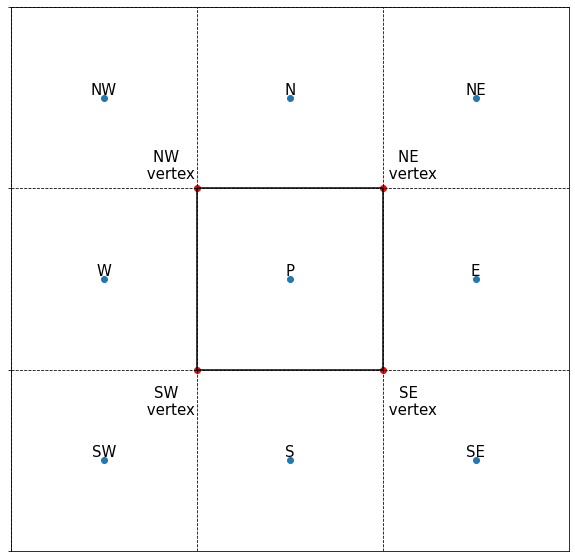

In [10]:
# Visualise Stencil
labels = ["SW", "S", "SE", "W", "P", "E", "NW", "N", "NE"]
labels_vertex = ["SW vertex", "SE vertex", "NE vertex", "NW vertex"]

x_points = [0.5, 1.5, 2.5, 0.5, 1.5, 2.5, 0.5, 1.5, 2.5]
y_points = [0.5,0.5, 0.5, 1.5, 1.5, 1.5, 2.5, 2.5, 2.5]

plt.figure(figsize=(10, 10))
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])
plt.tick_params(axis='x', which='both',  bottom=False, top=False, labelbottom=False, labelleft=False)
plt.tick_params(axis='y', which='both',  bottom=False, top=False, labelbottom=False, labelleft=False)

plt.plot([1, 2, 2, 1,1], [1,1,2,2,1], c = "black")
plt.scatter([1, 2, 2, 1], [1,1,2,2], c = "red")

# plt.rc('grid', linestyle="--", color='black')
plt.grid(True)
plt.rc('grid', linestyle="--", color='red', linewidth=1)
plt.scatter(x_points,y_points)


# dispx_new = dispx.reshape(len(dispx)*len(dispy), 1)
# dispy_new = dispy.reshape(len(dispx)*len(dispy), 1)

for i in np.arange(0,len(labels)):    
    plt.annotate(labels[i], xy=(x_points[i],y_points[i]), size = 15, horizontalalignment='center', verticalalignment='bottom')

plt.annotate("NW \n vertex", xy = (0.85,2.05),  size = 15, horizontalalignment='center', verticalalignment='baseline')
plt.annotate("NE \n vertex", xy = (2.15,2.05),  size = 15, horizontalalignment='center', verticalalignment='baseline')
plt.annotate("SE \n vertex", xy = (2.15,0.75),  size = 15, horizontalalignment='center', verticalalignment='baseline')
plt.annotate("SW \n vertex", xy = (0.85,0.75),  size = 15, horizontalalignment='center', verticalalignment='baseline')

# plt.annotate("Sf N", xy = (1.5, 2), size = 15)

# plt.annotate(str(0), xy=(dispx_new[0][0],dispy_new[0][0]))

plt.show()

The displacment $\bold{u} (u, v)$ at each point on the stencil is used to calculate the differential values

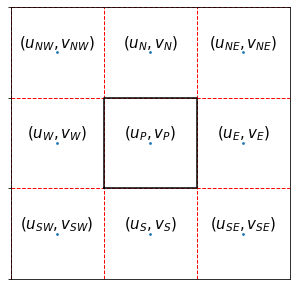

In [11]:
# Visualise Stencil
labels = ["$(u_{SW}, v_{SW})$", "$(u_{S}, v_{S})$", "$(u_{SE}, v_{SE})$", 
            "$(u_{W}, v_{W})$","$(u_{P}, v_{P})$", "$(u_{E}, v_{E})$", 
            "$(u_{NW}, v_{NW})$", "$(u_{N}, v_{N})$","$(u_{NE}, v_{NE})$"]

x_points = [0.5, 1.5, 2.5, 0.5, 1.5, 2.5, 0.5, 1.5, 2.5]
y_points = [0.5,0.5, 0.5, 1.5, 1.5, 1.5, 2.5, 2.5, 2.5]

plt.figure(figsize=(5, 5))
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.xticks([0,1,2,3])
plt.yticks([0,1,2,3])
plt.tick_params(axis='x', which='both',  bottom=False, top=False, labelbottom=False, labelleft=False)
plt.tick_params(axis='y', which='both',  bottom=False, top=False, labelbottom=False, labelleft=False)
plt.plot([1, 2, 2, 1,1], [1,1,2,2,1], c = "black")
plt.grid(True)
plt.rc('grid', linestyle="--", color='red', linewidth=1)
plt.scatter(x_points, y_points, s = 3)

for i in np.arange(0,len(labels)):    
    plt.annotate(labels[i], xy=(x_points[i],y_points[i]), size = 15, horizontalalignment='center', verticalalignment='bottom')

plt.show()

<!-- This needs to be re-worded -->

From spatial variation we assume the differential values are constant accross the face, this value is approximated at the centre of the face

Looking at just the North face:

The differential values in the same direction as the area vector can be easily calculated:

$\frac{\delta u}{\delta y}$ & 
$\frac{\delta v}{\delta y}$ 
is the difference between $u_{N}, v_{N}$ and $u_{P}, v_{P}$, over $\delta y$

However, the differential values in the direction perpendiculate to the area vector is morecomplicated to calculate:

First, the average value at vertex points on the face must be calculated.


$ \dfrac{\delta u}{\delta x} = \dfrac{u_{NE, vertex} -  u_{NW, vertex}}{\delta x} $

$ u_{NE, vertex} = \dfrac{1}{4} (u_{NE} + u_{N} + u_{E} + u_{P})$

$ u_{NW, vertex} = \dfrac{1}{4} (u_{NW} + u_{N} + u_{W} + u_{P})$

In [12]:
# P is the cell index for cell P

P = 55

N = P  + (nx + 2)
S = P - (nx + 2)
E = P + (1)
W = P - (1)

NE = P + (nx + 2) + (1)
NW = P + (nx + 2) - (1)
SE = P - (nx + 2) + (1)
SW = P - (nx + 2) - (1)

In [13]:
def vertex(location, uv, P):

    if uv == "u":
            uv_i = 0
    elif uv == "v":
            uv_i = 1

    if location == "NE":
        return (1/4)*(U[NE, uv_i] + U[N, uv_i] + U[E, uv_i] + U[P, uv_i])
    if location == "NW":
        return (1/4)*(U[NW, uv_i] + U[N, uv_i] + U[W, uv_i] + U[P, uv_i])
    if location == "SE":
        return (1/4)*(U[SE, uv_i] + U[S, uv_i] + U[E, uv_i] + U[P, uv_i])
    if location == "SW":
        return (1/4)*(U[SW, uv_i] + U[S, uv_i] + U[W, uv_i] + U[P, uv_i])
    

In [14]:
U = u_new

#North

du_dy_N = (U[N,0] - U[P,0])/dy
dv_dy_N = (U[N,1] - U[P,1])/dy

du_dx_N = (vertex( "NE", "u", P) - vertex( "NW", "u", P) )/dx
dv_dx_N = (vertex( "NE", "v", P) - vertex( "NW", "v", P) )/dx

#South

du_dy_S = (U[P,0] - U[S,0])/dy
dv_dy_S = (U[P,1] - U[S,1])/dy

du_dx_S = (vertex( "SE", "u", P) - vertex( "SW", "u", P) )/dx
dv_dx_S = (vertex( "SE", "v", P) - vertex( "SW", "v", P) )/dx

#East

du_dy_E = (vertex( "NE", "u", P) - vertex( "SE", "u", P) )/dy
dv_dy_E = (vertex( "NE", "v", P) - vertex( "SE", "v", P) )/dy

du_dx_E = (U[E,0] - U[P,0])/dx
dv_dx_E = (U[E,1] - U[P,1])/dx

#West

du_dy_W = (vertex( "NW", "u", P) - vertex( "SW", "u", P) )/dy
dv_dy_W = (vertex( "NW", "v", P) - vertex( "SW", "v", P) )/dy

du_dx_W = (U[P,0] - U[W,0])/dx
dv_dx_W = (U[P,1] - U[W,1])/dx

def du_dy(face):

    if face == "N": return du_dy_N
    if face == "S": return du_dy_S
    if face == "E": return du_dy_E
    if face == "W": return du_dy_W

def dv_dy(face):

    if face == "N": return dv_dy_N
    if face == "S": return dv_dy_S
    if face == "E": return dv_dy_E
    if face == "W": return dv_dy_W

def du_dx(face):

    if face == "N": return du_dx_N
    if face == "S": return du_dx_S
    if face == "E": return du_dx_E
    if face == "W": return du_dx_W

def dv_dx(face):

    if face == "N": return dv_dy_N
    if face == "S": return dv_dy_S
    if face == "E": return dv_dy_E
    if face == "W": return dv_dy_W


IndexError: index 61 is out of bounds for axis 0 with size 36

In [ ]:
def stress_matrix(face):

    def du_dy(face):

        if face == "N": return du_dy_N
        if face == "S": return du_dy_S
        if face == "E": return du_dy_E
        if face == "W": return du_dy_W

    def dv_dy(face):

        if face == "N": return dv_dy_N
        if face == "S": return dv_dy_S
        if face == "E": return dv_dy_E
        if face == "W": return dv_dy_W

    def du_dx(face):

        if face == "N": return du_dx_N
        if face == "S": return du_dx_S
        if face == "E": return du_dx_E
        if face == "W": return du_dx_W

    def dv_dx(face):

        if face == "N": return dv_dy_N
        if face == "S": return dv_dy_S
        if face == "E": return dv_dy_E
        if face == "W": return dv_dy_W
    
    du_dx = du_dx(face)
    dv_dx = dv_dx(face)
    du_dy = du_dy(face)
    dv_dy = dv_dy(face)

    stress_matrix = np.zeros((2,2)) 
    
    stress_matrix[0,0] = (2*mu + Lambda)*du_dx + Lambda*dv_dy
    stress_matrix[1,0] = mu*(dv_dx + du_dy)
    stress_matrix[0,1] = mu*(dv_dx + du_dy)
    stress_matrix[1,1] = (2*mu + Lambda)*dv_dy + Lambda*du_dx

    return stress_matrix

stress_matrix("N")

array([[0., 0.],
       [0., 0.]])

In [ ]:

# du_dy_N

# In this example we can easily print the index for each cell in the stencil for cell P:

print("Index for N cell: " + str(N))
print("Index for S cell: " + str(S))
print("Index for E cell: " + str(E))
print("Index for W cell: " + str(W))
print("Index for NE cell: " + str(NE))
print("Index for NW cell: " + str(NW))
print("Index for SE cell: " + str(SE))
print("Index for SW cell: " + str(SW))

Index for N cell: 65
Index for S cell: 45
Index for E cell: 56
Index for W cell: 54
Index for NE cell: 66
Index for NW cell: 64
Index for SE cell: 46
Index for SW cell: 44
